In [7]:
library(bnlearn)
library(Rgraphviz)

In [8]:
crear_subconjuntos <- function(archivo_csv, predictandos){
  data <- data.frame(lapply(read.csv(archivo_csv, colClasses = "character"), function(x) if (is.character(x)) as.factor(x) else x))
  data <- data[, !names(data) %in% "ID"]
  subconjuntos <- list()
  for (pred in predictandos){
    variables <- setdiff(names(data), predictandos)
    subconjuntodatos <- na.omit(data[, c(variables, pred), drop = FALSE])
    subconjuntos[[pred]] <- subconjuntodatos
  }
  return(subconjuntos)
}

dibujar_dag <- function(dag, predictando, data, tamanho){
  g <- graphviz.plot(dag, render = FALSE)
  graph::nodeRenderInfo(g) <- list(fontsize = tamanho)
  colores <- colorear_nodos(nodes(dag), predictando)
  graph::nodeRenderInfo(g)$fill <- colores
  Rgraphviz::renderGraph(g)
}

colorear_nodos <- function(nodos, predictando){
  sapply(nodos, function(nodo){
    if (nodo == predictando){
      "blue"
    } else if (startsWith(nodo, "MH")){
      "green"
    } else if (startsWith(nodo, "PROC")){
      "orange"
    } else if (startsWith(nodo, "ADM")){
      "red"
    } else if (startsWith(nodo, "SOC")){
      "yellow"
    } else{
      "white"
    }
  })
}

eliminar_nodos_aislados <- function(estructura){
  nodos_eliminar <- nodes(estructura)[sapply(nodes(estructura), function(nodo){
    length(parents(estructura, nodo)) == 0 && length(children(estructura, nodo)) == 0
  })]
  if (length(nodos_eliminar) > 0){
    for (nodo in nodos_eliminar){
      estructura <- remove.node(estructura, nodo)
    }
  }
  return(estructura)
}

crear_estructura <- function(data, predictando){
  estructura <- hc(data)
  estructura <- eliminar_nodos_aislados(estructura)
  return(estructura)
}

procesar_archivos <- function(files, predictandos){
  for (file in files){
    subconjuntos <- crear_subconjuntos(file, predictandos)
    for (predictando in predictandos) {
      subconjuntodatos <- subconjuntos[[predictando]]
      estructura <- crear_estructura(subconjuntodatos, predictando)
      if (predictando %in% nodes(estructura)){
        dibujar_dag(estructura, predictando, subconjuntodatos, tamanho = 20)
      } else{
        dibujar_dag(estructura, predictando, subconjuntodatos, tamanho = 20)
        cat(predictando, "no está en la red")
      }
      vestructuras <- vstructs(estructura)
      cat("V-estructuras en la red \n")
      print(vestructuras)
    }
  }
}


V-estructuras en la red 
     X                   Z                   Y                   
[1,] "MH_Edad"           "MH_Fumador"        "MH_Sexo"           
[2,] "MH_Hipertension"   "MH_Dislipemia"     "MH_ACTPprevia"     
[3,] "MH_Diabetes"       "MH_HBpreKT"        "MH_IRC"            
[4,] "MH_QXcoronariapre" "MH_InfartoAntiguo" "MH_ACTPprevia"     
[5,] "MH_Fumador"        "MH_ACTPprevia"     "MH_EnfArtPerif.pre"
[6,] "MH_LocIAMprevio"   "MH_DA.stentpre"    "MH_ACTPprevia"     


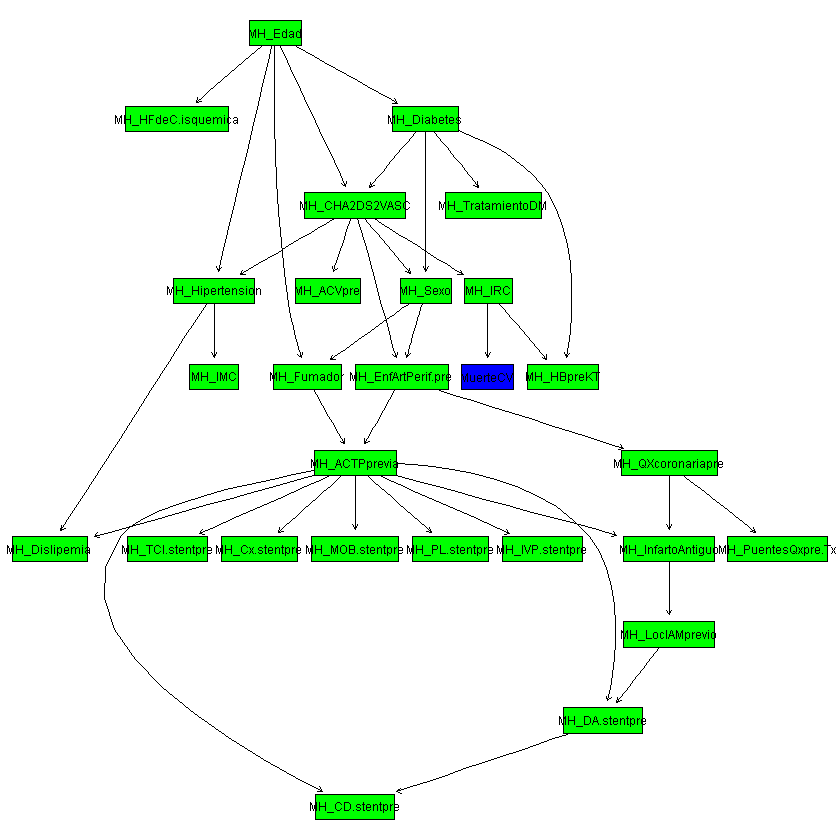

Revasc no está en la redV-estructuras en la red 
     X                   Z                   Y                   
[1,] "MH_Edad"           "MH_Fumador"        "MH_Sexo"           
[2,] "MH_Hipertension"   "MH_Dislipemia"     "MH_ACTPprevia"     
[3,] "MH_Diabetes"       "MH_HBpreKT"        "MH_IRC"            
[4,] "MH_QXcoronariapre" "MH_InfartoAntiguo" "MH_ACTPprevia"     
[5,] "MH_Fumador"        "MH_ACTPprevia"     "MH_EnfArtPerif.pre"
[6,] "MH_LocIAMprevio"   "MH_DA.stentpre"    "MH_ACTPprevia"     


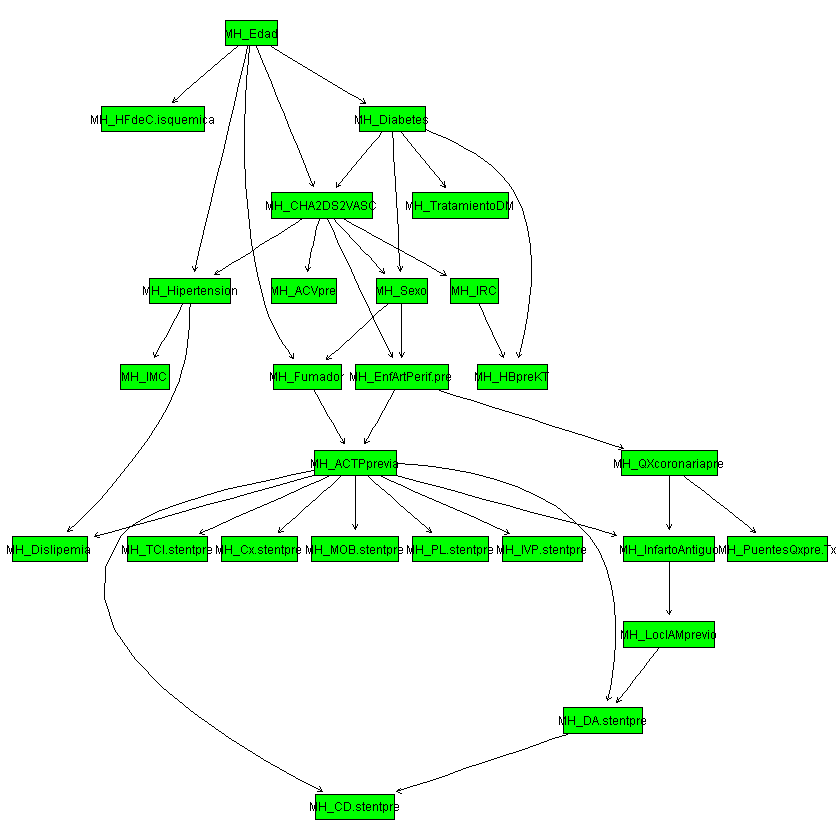

V-estructuras en la red 
      X                     Z                   Y                    
 [1,] "MH_Fumador"          "MH_Sexo"           "MH_CHA2DS2VASC"     
 [2,] "MH_ACTPprevia"       "MH_Fumador"        "P_IndicacionIAMCEST"
 [3,] "MH_Hipertension"     "MH_Dislipemia"     "MH_ACTPprevia"      
 [4,] "MH_Diabetes"         "MH_HBpreKT"        "MH_IRC"             
 [5,] "MH_QXcoronariapre"   "MH_InfartoAntiguo" "MH_ACTPprevia"      
 [6,] "MH_EnfArtPerif.pre"  "MH_QXcoronariapre" "P_DA.tratada"       
 [7,] "P_DA.Actual"         "MH_ACTPprevia"     "P_TratDecidido"     
 [8,] "MH_LocIAMprevio"     "MH_DA.stentpre"    "MH_ACTPprevia"      
 [9,] "P_IndicacionIAMCEST" "P_FE"              "P_DA.tratada"       
[10,] "MH_Sexo"             "P_Acceso"          "P_IndicacionIAMCEST"
[11,] "P_DA.tratada"        "P_TratDecidido"    "P_CD.tratada"       
[12,] "P_Cx.tratada"        "P_TratDecidido"    "P_CD.tratada"       
[13,] "P_TCI.Actual"        "P_TCI.tratada"     "P_TratDecidido" 

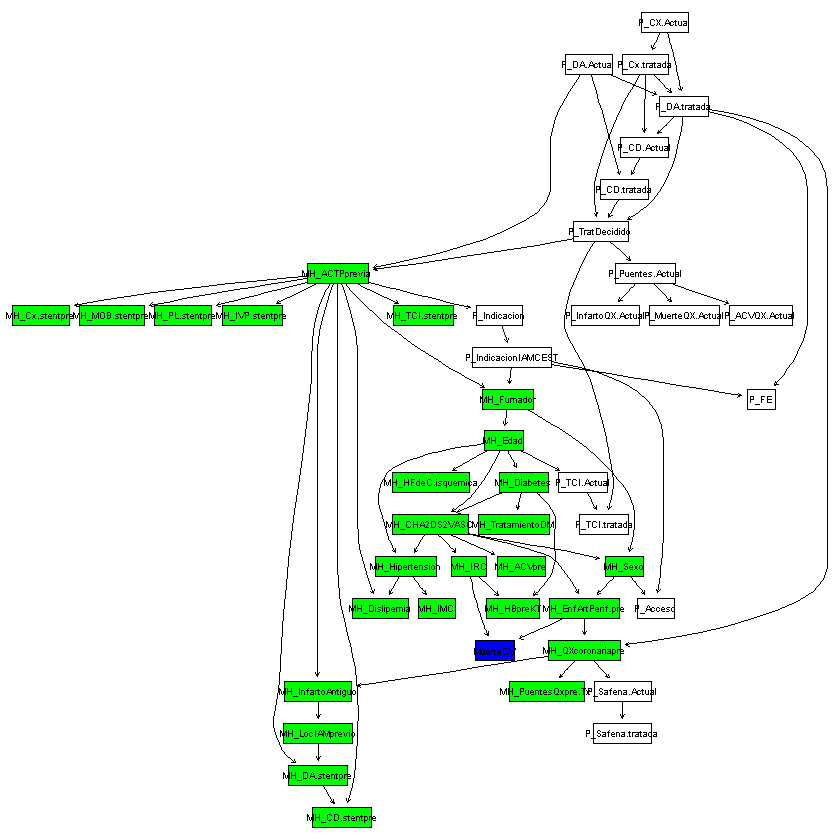

V-estructuras en la red 
      X                     Z                   Y                    
 [1,] "MH_Fumador"          "MH_Sexo"           "MH_CHA2DS2VASC"     
 [2,] "MH_ACTPprevia"       "MH_Fumador"        "P_IndicacionIAMCEST"
 [3,] "MH_Hipertension"     "MH_Dislipemia"     "MH_ACTPprevia"      
 [4,] "MH_Diabetes"         "MH_HBpreKT"        "MH_IRC"             
 [5,] "MH_QXcoronariapre"   "MH_InfartoAntiguo" "MH_ACTPprevia"      
 [6,] "MH_EnfArtPerif.pre"  "MH_QXcoronariapre" "P_DA.tratada"       
 [7,] "P_DA.Actual"         "MH_ACTPprevia"     "P_TratDecidido"     
 [8,] "MH_LocIAMprevio"     "MH_DA.stentpre"    "MH_ACTPprevia"      
 [9,] "P_IndicacionIAMCEST" "P_FE"              "P_DA.tratada"       
[10,] "MH_Sexo"             "P_Acceso"          "P_IndicacionIAMCEST"
[11,] "P_DA.tratada"        "P_TratDecidido"    "P_CD.tratada"       
[12,] "P_Cx.tratada"        "P_TratDecidido"    "P_CD.tratada"       
[13,] "P_TCI.Actual"        "P_TCI.tratada"     "P_TratDecidido" 

Warning message in doTryCatch(return(expr), name, parentenv, handler):
"zero-length arrow is of indeterminate angle and so skipped"
Warning message in doTryCatch(return(expr), name, parentenv, handler):
"zero-length arrow is of indeterminate angle and so skipped"


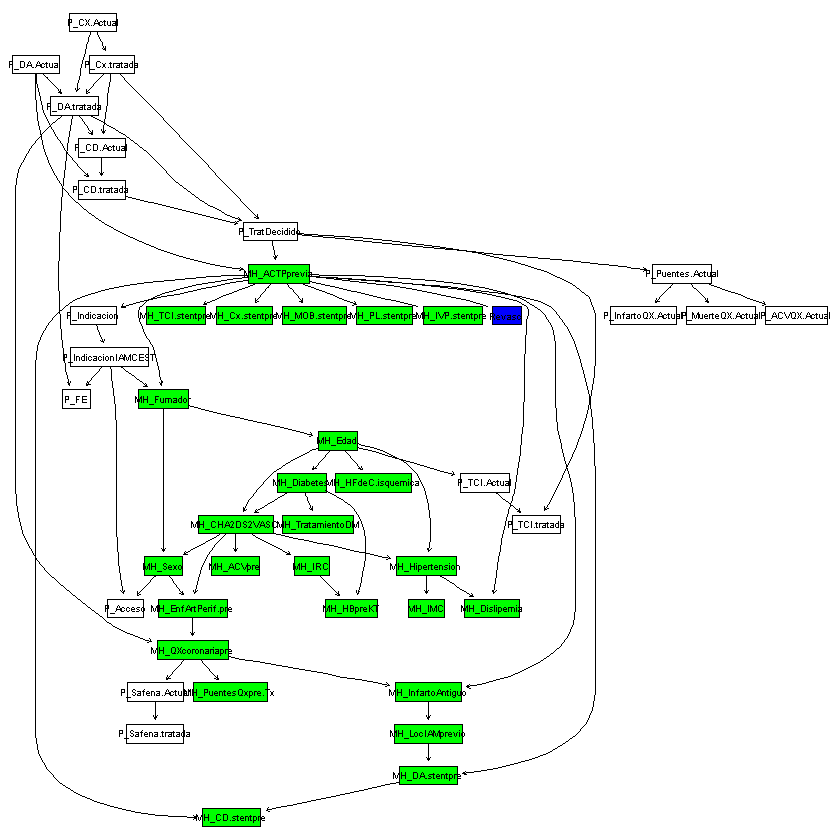

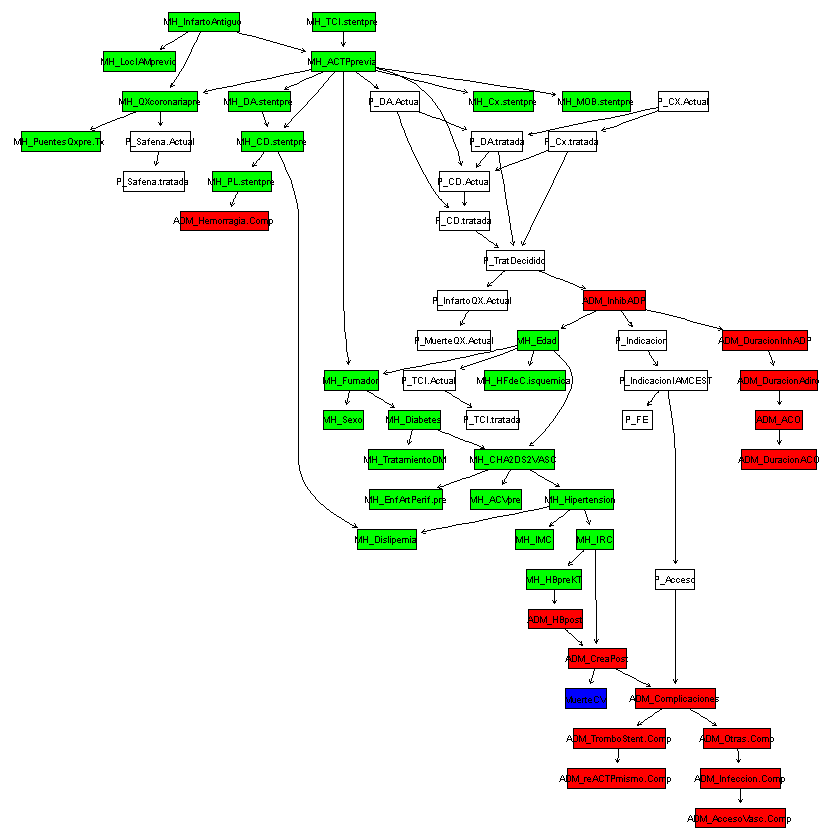

V-estructuras en la red 
      X                   Z                    Y                
 [1,] "MH_Edad"           "MH_Fumador"         "MH_ACTPprevia"  
 [2,] "MH_Hipertension"   "MH_Dislipemia"      "MH_CD.stentpre" 
 [3,] "MH_InfartoAntiguo" "MH_ACTPprevia"      "MH_TCI.stentpre"
 [4,] "MH_Edad"           "MH_CHA2DS2VASC"     "MH_Diabetes"    
 [5,] "MH_ACTPprevia"     "P_CD.Actual"        "P_DA.tratada"   
 [6,] "MH_ACTPprevia"     "P_CD.Actual"        "P_Cx.tratada"   
 [7,] "P_DA.tratada"      "P_CD.Actual"        "P_Cx.tratada"   
 [8,] "P_DA.tratada"      "P_TratDecidido"     "P_Cx.tratada"   
 [9,] "P_DA.tratada"      "P_TratDecidido"     "P_CD.tratada"   
[10,] "P_Cx.tratada"      "P_TratDecidido"     "P_CD.tratada"   
[11,] "P_DA.Actual"       "P_DA.tratada"       "P_CX.Actual"    
[12,] "P_DA.Actual"       "P_CD.tratada"       "P_CD.Actual"    
[13,] "P_Acceso"          "ADM_Complicaciones" "ADM_CreaPost"   
[14,] "MH_IRC"            "ADM_CreaPost"       "ADM_HBpost"     


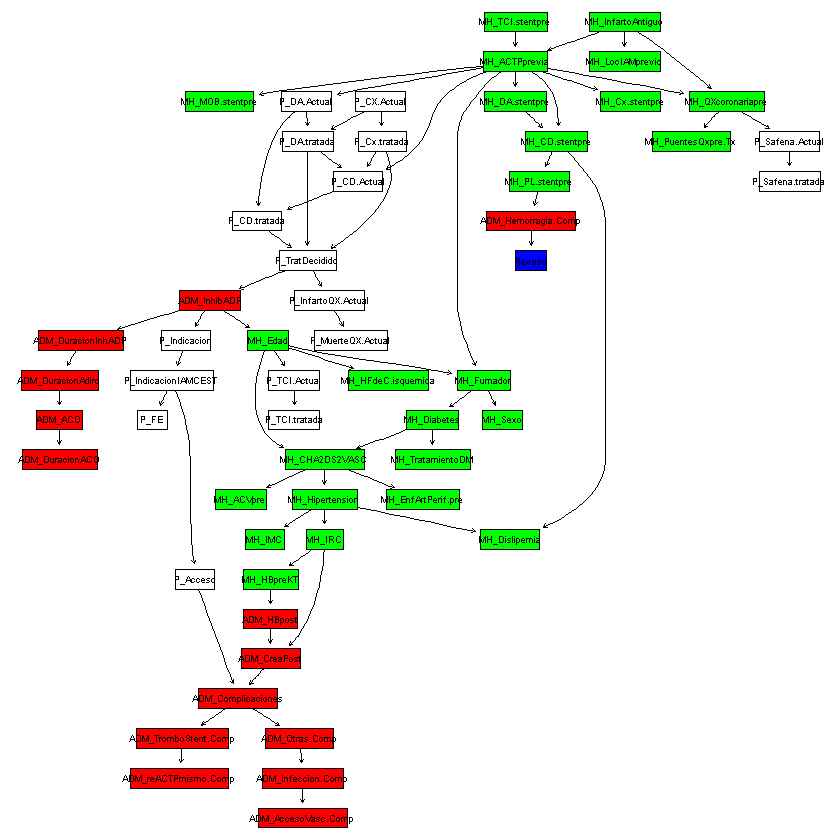

In [9]:
files <- c("medicalhistory_nonulls.csv", "medicalhistory_procedures_nonulls.csv", "medicalhistory_procedures_admission_nonulls.csv")
predictandos <- c("MuerteCV", "Revasc")
procesar_archivos(files, predictandos)